# Compiler examples

## Reshape and reduce

B : [ 0.14513934 -1.1003574   1.20800458 -1.03505931 -0.16433835  1.57920185
  0.93527154 -1.18980055 -0.07627852  2.4363974  -0.83015739  0.64056429
  0.89713815 -1.37539668  1.32941763  0.54358681  0.03504235 -0.99711117
 -0.10522062 -0.33955302  1.51937789 -0.31715561 -0.68027469 -0.05085041
  0.09948388  0.21171348  0.08607915  0.46061148  0.77925905  0.2552545
 -0.81031957  1.49610039  0.76408895  1.02375758  0.44374904 -1.74429321
  1.48153782 -0.60389842  1.56944013  0.95265759  1.21590285 -0.109862
  0.17712313  2.8704393   0.15912676  0.68193708 -0.38525332  0.6536176
 -0.419839   -0.20453954 -0.83874462  1.03597764 -0.50287102  0.78701495
  0.5222438  -0.61580786 -1.08300889 -1.48574227  1.1345383  -1.93181231]
C : [[ 0.14513934 -1.1003574   1.20800458 -1.03505931 -0.16433835  1.57920185
   0.93527154 -1.18980055 -0.07627852  2.4363974 ]
 [-0.83015739  0.64056429  0.89713815 -1.37539668  1.32941763  0.54358681
   0.03504235 -0.99711117 -0.10522062 -0.33955302]
 [ 1.51937789 -

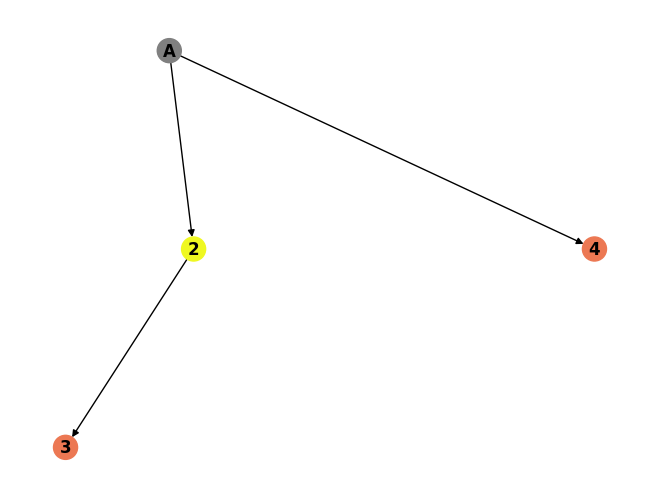

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.seterr(all="print")
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

join_and_split_axis_program = tc.compile("""
B[(ijk)] = A[i,j,k]
C[i,j] = B[(ij)]                                       
Row[j] = A[0,j,k]
""")

A = np.random.randn(3, 4, 5)
expected_B = A.reshape(60)
expected_C = expected_B.reshape(6, 10)
outputs = join_and_split_axis_program.execute(inputs={
    "A": A
}, shape_hints={
    "B": (60,),
    "C": (6,10),
    "Row": (4,)
})

print("B :", outputs["B"])
print("C :", outputs["C"])
print("Row :", outputs["Row"])

print("B ~= expected_B: ", np.allclose(outputs["B"], expected_B))
print("C ~= expected_C: ", np.allclose(outputs["C"], expected_C))

tc.viz.draw_program_graph(join_and_split_axis_program)

## Expressions with mutiple tensor orders

Positioning nodes


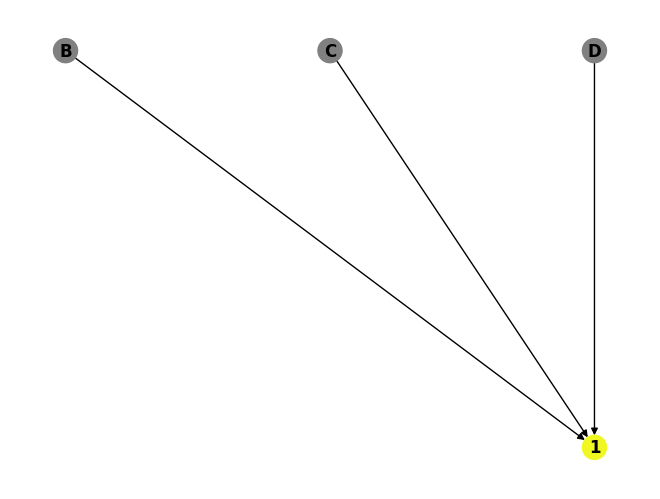

In [2]:
small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + sin(C[i]) + D + i")
# small_program = tc.compile("A[i,j] = sin(B[i,j] + C[i]) + D + i")
tc.viz.draw_program_graph(small_program)

['B[i,j]', 'B[j,i]', '+ 0', 'C[i]', 'sin 0', '+ 1', 'D[]', '+ 2', Token('INDEXVAR', 'i'), '+ 3']
Positioning nodes


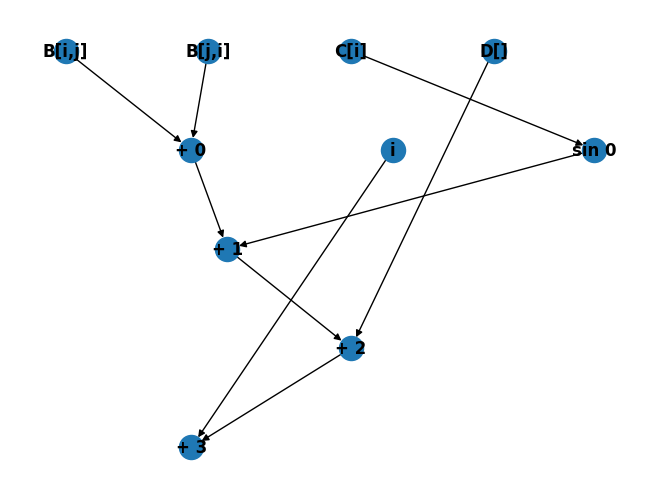

In [3]:
print(small_program.tensor_expressions[1].op_graph.nodes())
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [4]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + np.sin(C) + 100 + np.arange(10).reshape(-1,1)
result = small_program.execute({'B': B, 'C': C, 'D': 100}, shape_hints={'A': (10,10)})
print(expected)
print(result["A"])
np.all(result["A"] == expected)

[[101.00000979 101.00000979 101.00000979 101.00000979 101.00000979
  101.00000979 101.00000979 101.00000979 101.00000979 101.00000979]
 [102.00000979 102.00000979 102.00000979 102.00000979 102.00000979
  102.00000979 102.00000979 102.00000979 102.00000979 102.00000979]
 [103.00000979 103.00000979 103.00000979 103.00000979 103.00000979
  103.00000979 103.00000979 103.00000979 103.00000979 103.00000979]
 [104.00000979 104.00000979 104.00000979 104.00000979 104.00000979
  104.00000979 104.00000979 104.00000979 104.00000979 104.00000979]
 [105.00000979 105.00000979 105.00000979 105.00000979 105.00000979
  105.00000979 105.00000979 105.00000979 105.00000979 105.00000979]
 [106.00000979 106.00000979 106.00000979 106.00000979 106.00000979
  106.00000979 106.00000979 106.00000979 106.00000979 106.00000979]
 [107.00000979 107.00000979 107.00000979 107.00000979 107.00000979
  107.00000979 107.00000979 107.00000979 107.00000979 107.00000979]
 [108.00000979 108.00000979 108.00000979 108.00000979 1

np.True_

## Min reduction

In [5]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] += (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

result = min_red_program.execute({'X': X}, shape_hints={'Min': (10,)})
print(result["Min"])
print(np.all(result["Min"] == expected))



[-2.52831128 -2.76579284 -2.65185934 -2.33652293 -2.88849873 -2.47750809
 -2.71126689 -2.61863168 -2.20024326 -2.23691789]
[-2.52831128 -2.76579284 -2.65185934 -2.33652293 -2.88849873 -2.47750809
 -2.71126689 -2.61863168 -2.20024326 -2.23691789]
True


## KMeans Kernel

Reducing the classic way
Reducing the classic way
Reducing the classic way
Min:  [ 3.00156206  3.687208    5.61268673  3.88875044  0.          0.
  5.23416754  0.19196519  7.87018273  2.28509444  8.60617912  3.19017047
  2.29693357  7.92941948 10.99941425  3.37955416  4.64200471  0.
  4.99608535  0.        ]
expected_min:  [ 3.00156206  3.687208    5.61268673  3.88875044  0.          0.
  5.23416754  0.19196519  7.87018273  2.28509444  8.60617912  3.19017047
  2.29693357  7.92941948 10.99941425  3.37955416  4.64200471  0.
  4.99608535  0.        ]
expected_Labels:  [3 3 3 0 4 3 4 0 4 4 2 4 4 3 0 2 2 0 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True]
Labels:  [3. 3. 3. 1. 4. 3. 4. 1. 4. 4. 2. 4. 4. 3. 1. 2. 2. 1. 2. 2.]
Dist ~= expected_Dist:  True
Min ~= expected_Min:  True
Labels ~= expected_Labels:  False
Count ~= expected_Count:  False
Update ~= expected_Update:  False
expected_Update: [[ 0.63276902  0.26

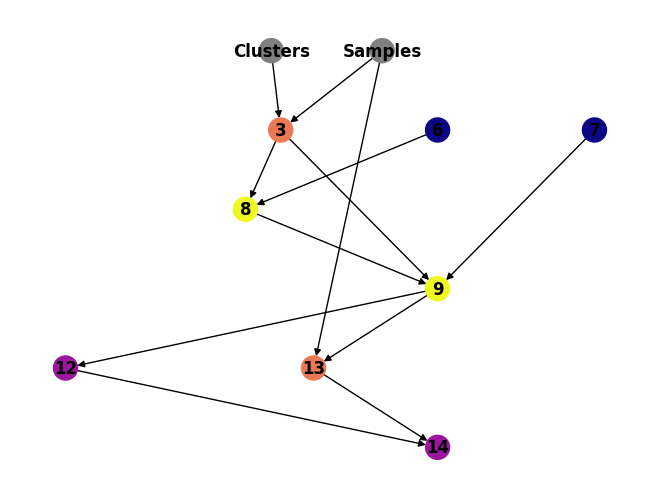

In [6]:
from scipy.spatial.distance import cdist
TOL = 1e-7

code = """
# Distance computation
Dist[j,k] += (Samples[j,l] - Clusters[k,l]) ^ 2

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

n_samples = 20
sample_dim = 5
n_cluster = 5

Samples = np.random.randn(n_samples, sample_dim)
Clusters = Samples[np.random.randint(n_samples, size=n_cluster)]

# Compute expected labels
expected_Dist = cdist(Samples, Clusters, 'sqeuclidean')
expected_Min = np.min(expected_Dist, axis=1)
expected_Labels = expected_Dist.argmin(axis=1)

# Update cluster centers
expected_Count = np.zeros(n_cluster)
expected_Update = np.zeros((n_cluster, sample_dim))

for j in range(n_samples):
    l = expected_Labels[j]
    expected_Count[l] += 1
    expected_Update[l] += Samples[j]

expected_Update /= expected_Count.reshape(-1, 1)


outputs = kmeans_kernel.execute(inputs={
    'Samples': Samples,
    'Clusters': Clusters
}, shape_hints={
    'Dist': (n_samples, n_cluster),
    'Min': (n_samples,),
    'Labels': (n_samples,),
    'Count': (n_cluster,),
    'Update': (n_cluster, sample_dim)
})

print("Min: ", outputs['Min'])
print("expected_min: ", expected_Min)
print("expected_Labels: ", expected_Labels)
print(expected_Min == outputs['Min'])
print("Labels: ", outputs['Labels'])
print("Dist ~= expected_Dist: ", np.all(outputs['Dist'] == expected_Dist))
print("Min ~= expected_Min: ", np.allclose(outputs['Min'], expected_Min))
print("Labels ~= expected_Labels: ", np.all(outputs['Labels'] == expected_Labels))
print("Count ~= expected_Count: ", np.all(outputs['Count'] == expected_Count))
print("Update ~= expected_Update: ", np.allclose(outputs['Update'], expected_Update))
print(f"expected_Update: {expected_Update}")
print(f"Update: {outputs['Update']}")

draw_program_graph(kmeans_kernel, color_by="opcount")

Positioning nodes


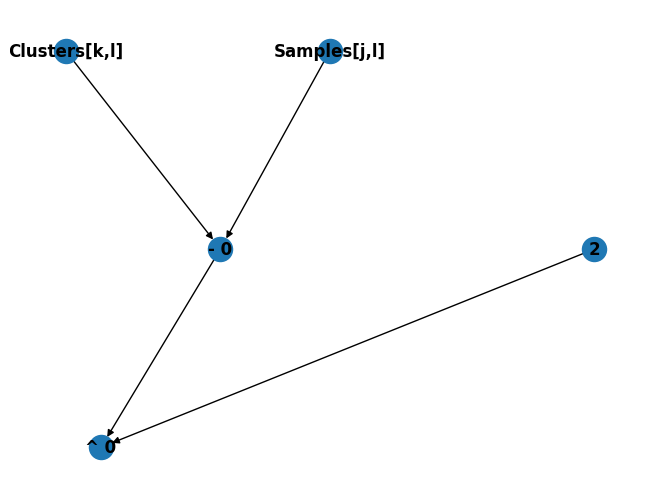

In [7]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

## Conjugate Gradient

Positioning nodes


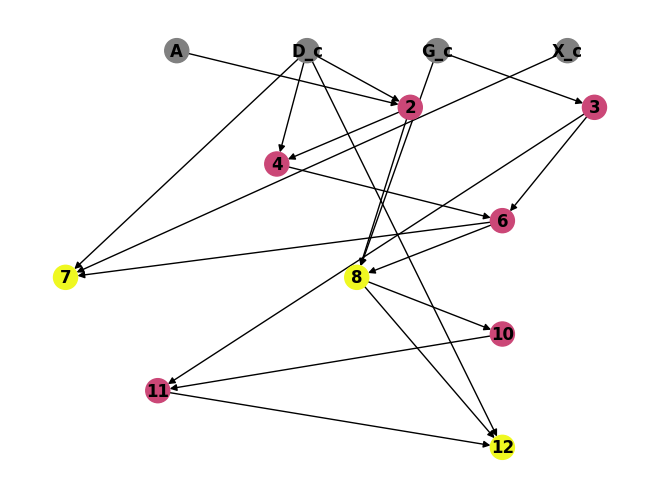

In [8]:
code = """
W_c[i] += A[i,j] * D_c[j]
Gamma_c += G_c[i] * G_c[i]
Theta_c += D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n += G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n += (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


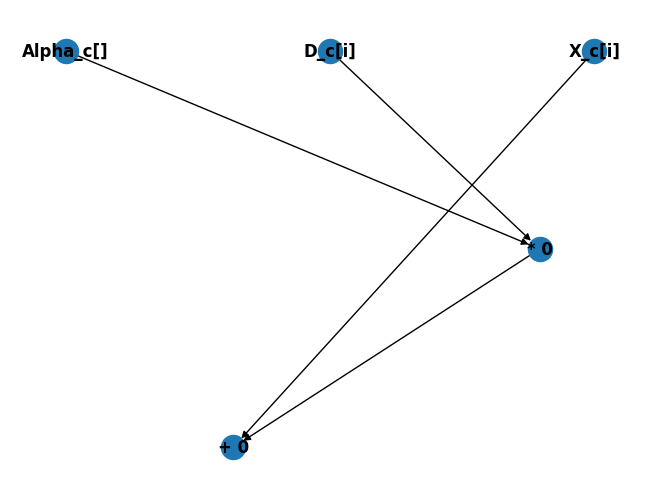

In [9]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

## Transformer (Multi-Head Attention)

**Constants**

- B: Batch Size
- L: Sequence Lenght
- M: Embedding Size
- H: Number of Atte Heads
- E: Head Embedding Size (M / H)
- Sqe: sqrt(E)


**Inputs**

- X: Samples (B x L x M)
- W(q|k|v): Query/Key/Value Weight Matrix (H x M x E)
- Wo: Linear Layer (M x M)


Positioning nodes


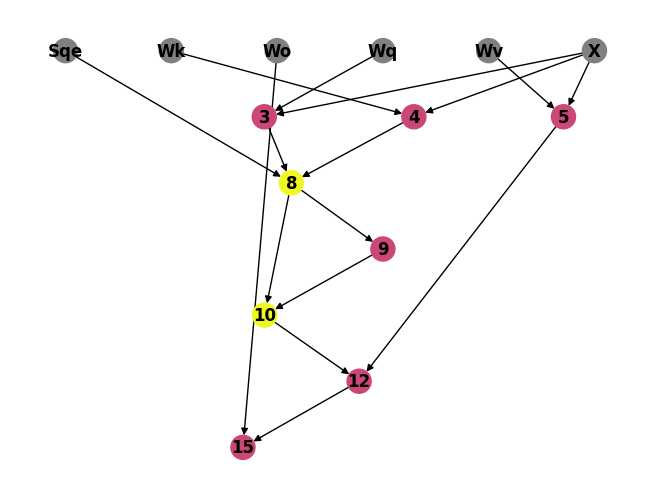

In [38]:
code = """
# Query, Key, Value
Q[i,j,k,l] += X[i,k,m] * Wq[j,m,l] # (B x H x L x E) 
K[i,j,k,l] += X[i,k,m] * Wk[j,m,l] # (B x H x L x E) 
V[i,j,k,l] += X[i,k,m] * Wv[j,m,l] # (B x H x L x E) 

# Attention
A[i,j,k,m] += (Q[i,j,k,l] * K[i,j,m,l]) / Sqe # (B x H x L x L)
Denom[i,j,k] += exp(A[i,j,k,m]) # (B x H x L)
Softmax[i,j,k,m] = exp(A[i,j,k,m]) / Denom[i,j,k] # (B x H x L x L)

Atte[i,j,(kl)] += Softmax[i,k,j,m] * V[i,k,m,l] # (B x L x M)

# Linear
Z[i,j,l] += Atte[i,j,k] * Wo[l,k] # (B x L x M)
"""
mha_kernel = tc.compile(code)

draw_program_graph(mha_kernel, color_by='opcount')


In [39]:
import math
import torch
from torch import nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output
    



In [44]:
d_model = 64
num_heads = 8
seq_length = 5
batch_size = 3
head_dim = d_model // num_heads

model = MultiHeadAttention(d_model, num_heads)

print(model.W_q.weight.dtype)
W_q = model.W_q.weight.detach().numpy().reshape(num_heads, head_dim, d_model).transpose(0, 2, 1)
W_k = model.W_k.weight.detach().numpy().reshape(num_heads, head_dim, d_model).transpose(0, 2, 1)
W_v = model.W_v.weight.detach().numpy().reshape(num_heads, head_dim, d_model).transpose(0, 2, 1)
W_o = model.W_o.weight.detach().numpy()

X = np.random.randn(batch_size, seq_length, d_model).astype(np.float32)
torch_X = torch.tensor(X, dtype=torch.float32)

expected_result = model(torch_X,torch_X,torch_X).detach().numpy()
print(expected_result.shape)

outputs = mha_kernel.execute(inputs={
    'X': X,
    'Wq': W_q,
    'Wk': W_k,
    'Wv': W_v,
    'Wo': W_o,
    'Sqe': math.sqrt(d_model//num_heads),
}, shape_hints={
    'Q': (batch_size, num_heads, seq_length, head_dim),
    'K': (batch_size, num_heads, seq_length, head_dim),
    'V': (batch_size, num_heads, seq_length, head_dim),
    'A': (batch_size, num_heads, seq_length, seq_length),
    'Denom': (batch_size, num_heads, seq_length),
    'Softmax': (batch_size, num_heads, seq_length, seq_length),
    'Atte': (batch_size, seq_length, d_model),
    'Z': (batch_size, seq_length, d_model),
})
print(outputs['Z'].shape)
print(np.allclose(outputs['Z'], expected_result, atol=1e-8))
    

torch.float32
(3, 5, 64)
Reducing the classic way


In [43]:
tol = 1e-6
expected_Q = model.split_heads(model.W_q(torch_X))
print("Q close", np.allclose(outputs['Q'], expected_Q.detach().numpy(), atol=tol))

expected_K = model.split_heads(model.W_k(torch_X))
print("K close", np.allclose(outputs['K'], expected_K.detach().numpy(), atol=tol))

expected_V = model.split_heads(model.W_v(torch_X))
print("V close", np.allclose(outputs['V'], expected_V.detach().numpy(), atol=tol))

expected_attn_scores = torch.matmul(expected_Q, expected_K.transpose(-2, -1)) / math.sqrt(head_dim)
print("Attn scores close", np.allclose(outputs['A'], expected_attn_scores.detach().numpy(), atol=tol))

expected_attention_probs = torch.softmax(expected_attn_scores, dim=-1)
print("Softmax close", np.allclose(outputs['Softmax'], expected_attention_probs.detach().numpy(), atol=tol))

expected_Attn = model.combine_heads(model.scaled_dot_product_attention(expected_Q, expected_K, expected_V))
print("Attn close", np.allclose(outputs['Atte'], expected_Attn.detach().numpy(), atol=tol))

expected_output = model.W_o(expected_Attn)
print("Output close", np.allclose(outputs['Z'], expected_output.detach().numpy(), atol=tol))
print(outputs['Z'] - expected_output.detach().numpy())

Q close True
K close True
V close True
Attn scores close True
Softmax close True
Attn close True
Output close True
[[[ 0.00000000e+00  1.49011612e-08  0.00000000e+00  0.00000000e+00
    0.00000000e+00 -2.98023224e-08  2.98023224e-08 -2.98023224e-08
    7.45058060e-09  1.49011612e-08 -4.37721610e-08 -2.98023224e-08
    2.56113708e-08  2.98023224e-08  2.98023224e-08 -1.49011612e-08
   -5.21540642e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   -1.49011612e-08 -1.49011612e-08  2.98023224e-08  4.47034836e-08
    2.98023224e-08 -5.96046448e-08  2.98023224e-08  4.47034836e-08
    0.00000000e+00  1.30385160e-08  5.96046448e-08  2.98023224e-08
    3.35276127e-08 -2.98023224e-08 -2.88709998e-08 -1.11758709e-08
    2.23517418e-08 -4.84287739e-08  0.00000000e+00  2.98023224e-08
    5.96046448e-08 -5.58793545e-09  0.00000000e+00  3.72529030e-08
    5.58793545e-08  1.66473910e-08 -2.98023224e-08  2.98023224e-08
   -1.49011612e-08  7.45058060e-09  1.49011612e-08 -6.33299351e-08
    7.45058060